In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [71]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
current_directory = pathlib.Path().resolve()
data_dir = current_directory / "Dataset2"

In [72]:
print(data_dir)

C:\Users\Prath\OneDrive\Desktop\resnet - model\Dataset2


C:\Users\Prath\OneDrive\Desktop\resnet - model\Dataset2\helmet\BikesHelmets0.png


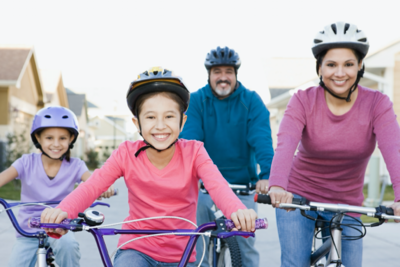

In [73]:
from PIL import Image
roses = list(data_dir.glob('helmet/*'))
print(roses[0])
image = Image.open(str(roses[0]))
image_rgb = image.convert("RGB")
display(image_rgb)

In [74]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 404 files belonging to 2 classes.
Using 324 files for training.


In [75]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 404 files belonging to 2 classes.
Using 80 files for validation.


In [76]:
class_names = train_ds.class_names
print(class_names)

['helmet', 'no_helmet']


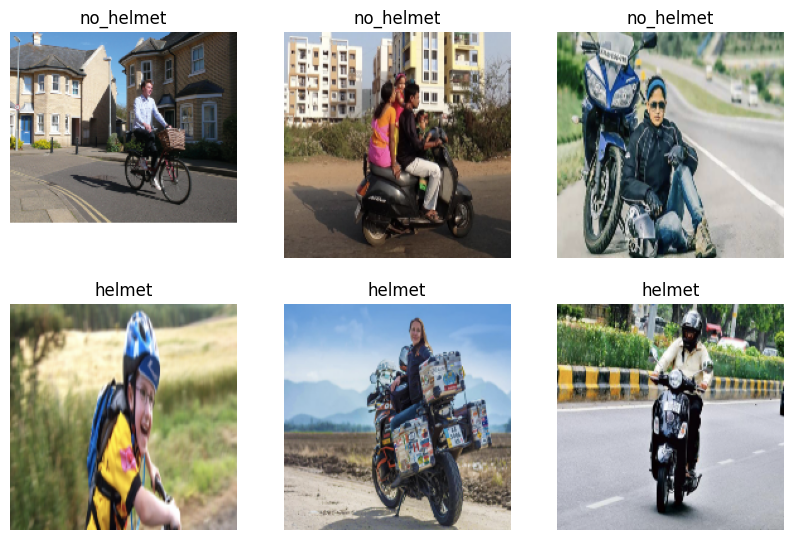

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [78]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [79]:
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_15 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_16 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_17 (ModuleW  (None, 1)                 513       
 rapper)                                                         
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [52]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


c:\Users\Prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 38s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 2/10
11/11 [==============================] - 30s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 3/10
11/11 [==============================] - 30s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 4/10
11/11 [==============================] - 31s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 5/10
11/11 [==============================] - 30s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 6/10
11/11 [==============================] - 30s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+00 - val_accuracy: 0.3375
Epoch 7/10
11/11 [==============================] - 30s 3s/step - loss: 0.0000e+00 - accuracy: 0.2747 - val_loss: 0.0000e+0

In [64]:
resnet_model.save("kamal_model", save_format="tf")

INFO:tensorflow:Assets written to: kamal_model\assets


INFO:tensorflow:Assets written to: kamal_model\assets


# Evaluating The Model

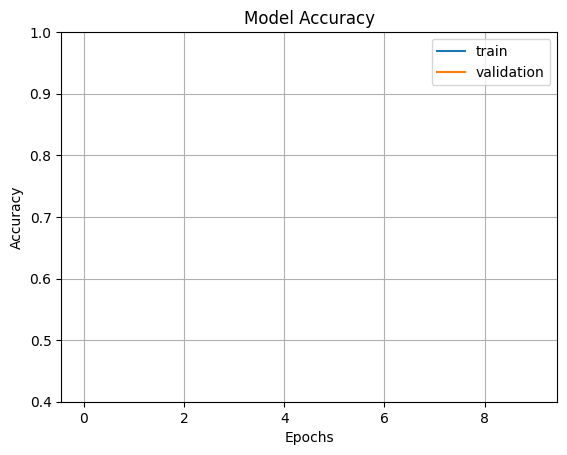

In [55]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

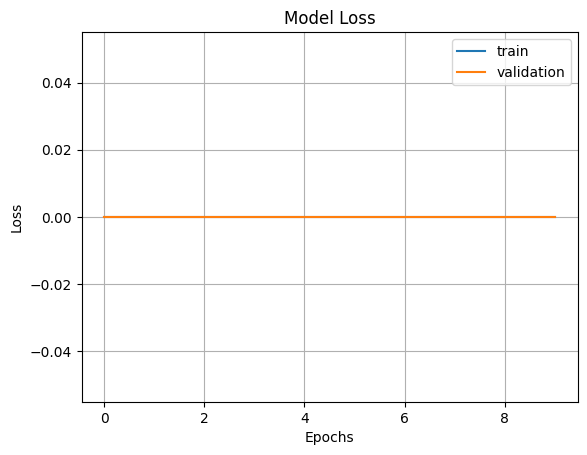

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [66]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [67]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 2s 2s/step
[[1.]]


In [69]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is helmet
